1️⃣ Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: display settings for clean output
pd.set_option('display.max_columns', None)


2️⃣ Load the Dataset

In [3]:
df = pd.read_csv("dynamic_pricing.csv")


In [4]:
# Check dimensions
print("Shape of dataset:", df.shape)

# Preview first few rows
df.head()


Shape of dataset: (1000, 10)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


Data Summary and Structure

In [5]:
# Check data types and null values
df.info()

# Descriptive statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000
unique,NaN,NaN,3,3,NaN,NaN,4,2,NaN,NaN
top,NaN,NaN,Urban,Silver,NaN,NaN,Night,Premium,NaN,NaN
freq,NaN,NaN,346,367,NaN,NaN,276,522,NaN,NaN
mean,60.372000,27.076000,NaN,NaN,50.031000,4.257220,NaN,NaN,99.58800,372.502623
std,23.701506,19.068346,NaN,NaN,29.313774,0.435781,NaN,NaN,49.16545,187.158756
min,20.000000,5.000000,NaN,NaN,0.000000,3.500000,NaN,NaN,10.00000,25.993449
25%,40.000000,11.000000,NaN,NaN,25.000000,3.870000,NaN,NaN,59.75000,221.365202
50%,60.000000,22.000000,NaN,NaN,51.000000,4.270000,NaN,NaN,102.00000,362.019426
75%,81.000000,38.000000,NaN,NaN,75.000000,4.632500,NaN,NaN,143.00000,510.497504


Check for Missing Values

In [6]:
df.isnull().sum()


Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Check how many duplicate rows exist

In [7]:
df.duplicated().sum()


0

6: Exploratory Data Analysis (EDA)

6.1 Check Data Types & Unique Values

In [8]:
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Location_Category: ['Urban' 'Suburban' 'Rural']
Customer_Loyalty_Status: ['Silver' 'Regular' 'Gold']
Time_of_Booking: ['Night' 'Evening' 'Afternoon' 'Morning']
Vehicle_Type: ['Premium' 'Economy']


6.2 Visualize Target Variable

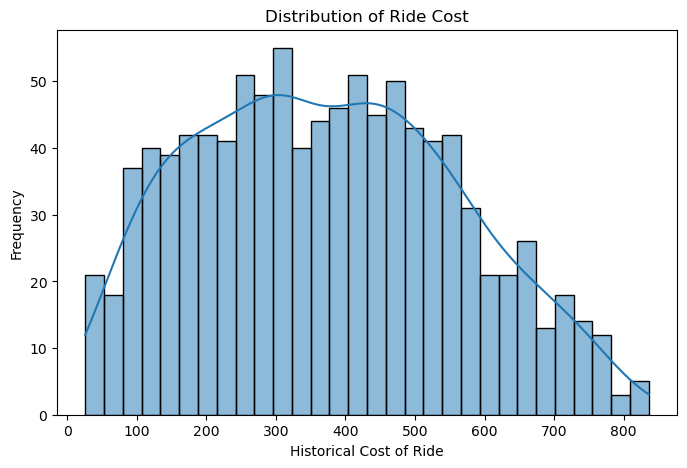

In [9]:
# Distribution of the target variable (Historical Cost)
plt.figure(figsize=(8, 5))
sns.histplot(df['Historical_Cost_of_Ride'], bins=30, kde=True)
plt.title('Distribution of Ride Cost')
plt.xlabel('Historical Cost of Ride')
plt.ylabel('Frequency')
plt.show()


6.3 Correlation Heatmap (Numerical Features)

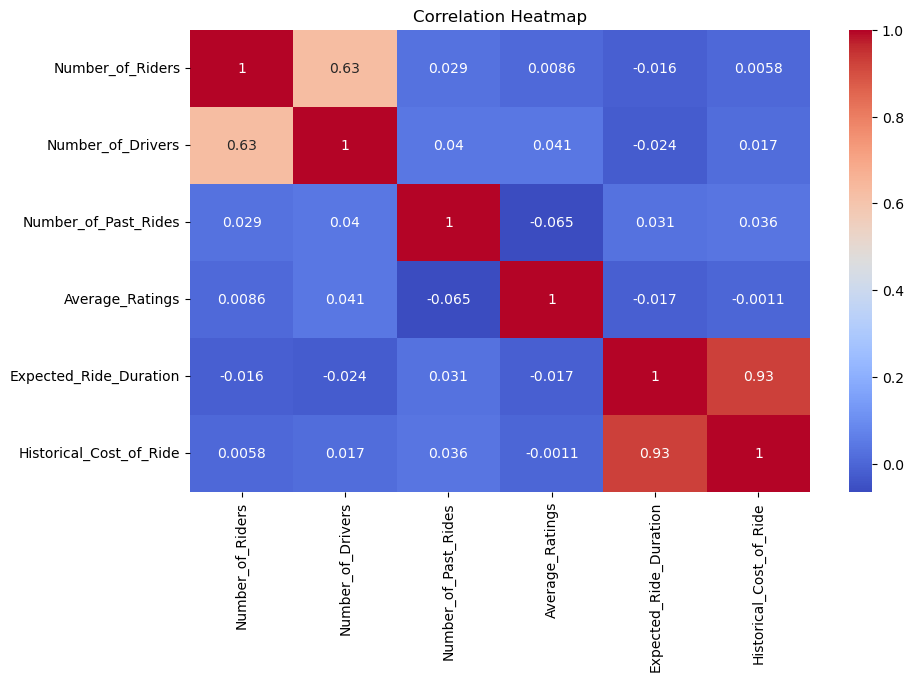

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


6.4 Visualize Relationships

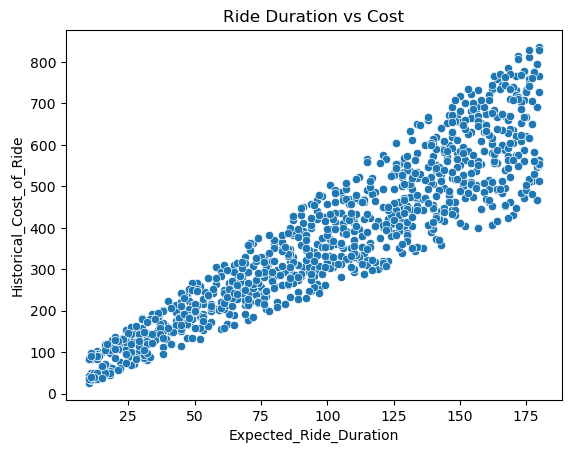

In [11]:
# Example: Relationship between ride duration and cost
sns.scatterplot(data=df, x='Expected_Ride_Duration', y='Historical_Cost_of_Ride')
plt.title('Ride Duration vs Cost')
plt.show()


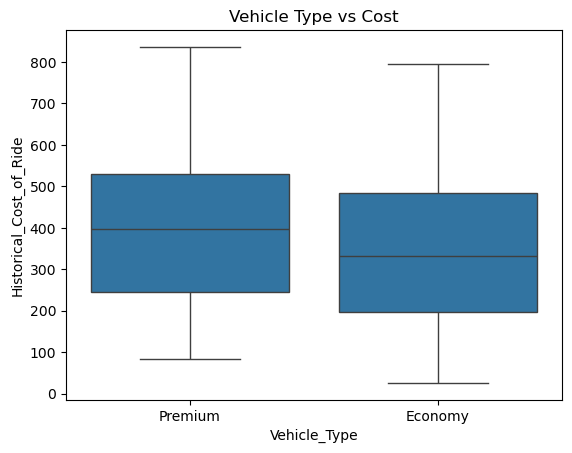

In [12]:
# Example: Boxplot for Vehicle Type vs Cost
sns.boxplot(data=df, x='Vehicle_Type', y='Historical_Cost_of_Ride')
plt.title('Vehicle Type vs Cost')
plt.show()


Bar charts

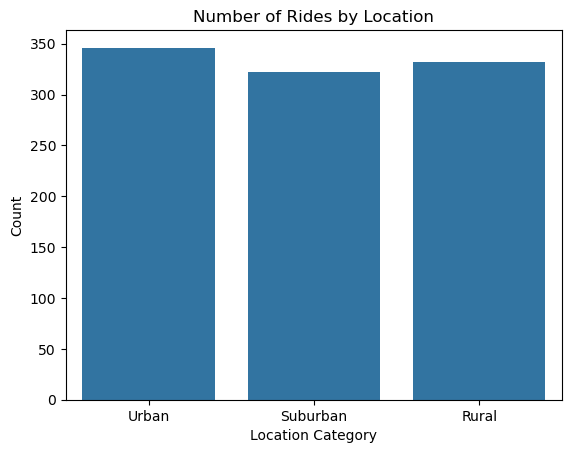

In [13]:
sns.countplot(data=df, x='Location_Category')
plt.title("Number of Rides by Location")
plt.xlabel("Location Category")
plt.ylabel("Count")
plt.show()


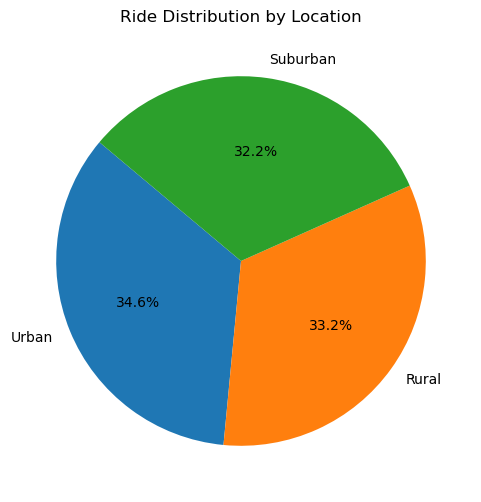

In [14]:
location_counts = df['Location_Category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Ride Distribution by Location")
plt.show()


EDA on Training Set (Lecturer’s Requirement)

In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


Verify Training Set

In [16]:
train_df.info()
train_df.describe()
train_df.isnull().sum()
train_df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         800 non-null    int64  
 1   Number_of_Drivers        800 non-null    int64  
 2   Location_Category        800 non-null    object 
 3   Customer_Loyalty_Status  800 non-null    object 
 4   Number_of_Past_Rides     800 non-null    int64  
 5   Average_Ratings          800 non-null    float64
 6   Time_of_Booking          800 non-null    object 
 7   Vehicle_Type             800 non-null    object 
 8   Expected_Ride_Duration   800 non-null    int64  
 9   Historical_Cost_of_Ride  800 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 68.8+ KB


0

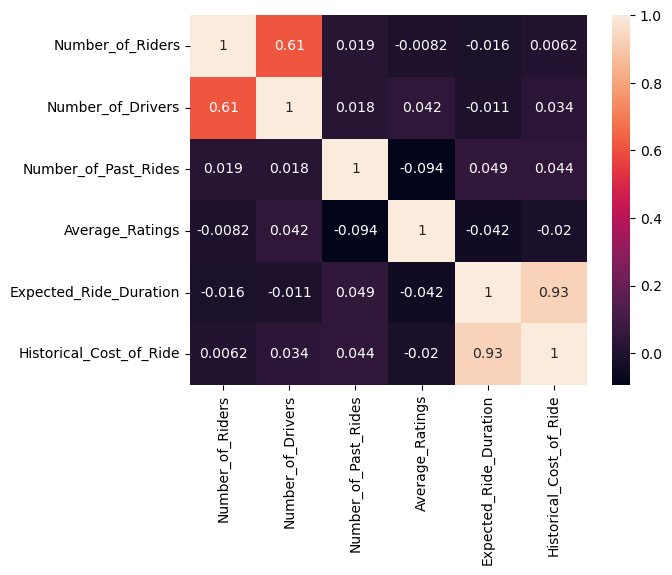

In [19]:
# If you're doing EDA on the TRAIN set:
train_num = train_df.select_dtypes(include='number')   # numeric columns only
corr = train_num.corr()                                # or .corr(numeric_only=True) on newer pandas
sns.heatmap(corr, annot=True)
plt.show()


Fitting a model → encode categoricals first

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd

# Split first (since your lecturer requires EDA on train only)
X = df.drop('Historical_Cost_of_Ride', axis=1)
y = df['Historical_Cost_of_Ride']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Identify columns
num_cols = X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include='object').columns

# Preprocess: scale numeric, one-hot encode categorical
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'
)

# Build pipeline
model = Pipeline(steps=[
    ('prep', preprocess),
    ('reg', LinearRegression())
])

# Fit & evaluate
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
print("R² on test:", r2)


R² on test: 0.8752468282750773
